In [1]:
# takes 30s
# read acbl events sql table, cleanup, write to acbl_events_cleaned.pkl.

# Next steps:
# any training needed?

# Previous steps:
# acbl_download_club_results_to_json.ipynb
# acbl_club_results_json_to_sql.ipynb

# todo:
# more reports

In [2]:
import config
import pandas as pd
import pathlib
import pickle
import sqlalchemy
import sys

import matplotlib
import matplotlib.pyplot as plt

In [3]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [6]:
# using pathlib to create sqlite path.
db_connection_string = 'sqlite:///'+acblPath.joinpath('acbl-details.sqlite').as_posix()
db_connection_string

'sqlite:///e:/bridge/data/acbl/acbl-details.sqlite'

In [7]:
def db_to_frames_dict(engine):
    meta = sqlalchemy.MetaData()
    meta.reflect(engine)
    tables = meta.tables.keys()
    cnx = engine.raw_connection()
    return {t: pd.read_sql(f'SELECT * FROM {t}', cnx ) for t in tables}

In [8]:
# create dict of sql SELECT statements.
sql_selects_d = {
    'events':'SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events'
    }

In [9]:
# takes 12s
dfs = {}
for k,v in sql_selects_d.items():
    engine = sqlalchemy.create_engine(db_connection_string) #, echo=True)
    with engine.connect() as con:
        if False:
            dfs = db_to_frames_dict(engine)
        else:
            print(f'{k}:{v}')
            dfs[k] = pd.read_sql(v, con)
    engine.dispose()

events:SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events


In [10]:
for k,v in dfs.items():
    display(k,v.head(),v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430051 entries, 0 to 430050
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              430051 non-null  int64  
 1   event_name            430051 non-null  object 
 2   club_name             430051 non-null  object 
 3   club_id_number        430051 non-null  int64  
 4   event_type            430051 non-null  object 
 5   rating                430051 non-null  int64  
 6   board_scoring_method  430051 non-null  object 
 7   stratification_type   430051 non-null  object 
 8   winner_type           430051 non-null  int64  
 9   club_class            430051 non-null  int64  
 10  tb_count              430051 non-null  float64
 11  club_session          430051 non-null  object 
 12  start_date            430051 non-null  object 
 13  end_date              430051 non-null  object 
 14  mpLimits              430051 non-null  object 
 15  

'events'

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/17/2020,02/17/2020,MP Limits: None,1.00
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/24/2020,02/24/2020,MP Limits: None,1.00
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,03/02/2020,03/02/2020,MP Limits: None,1.00
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,03/09/2020,03/09/2020,MP Limits: None/100,1.00
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,03/16/2020,03/16/2020,MP Limits: None,1.00


None

In [11]:
events_dtypes = {
    'event_id':'int64',
    'event_name':'string',
    'club_name':'string',
    'club_id_number':'int64',
    'event_type':'string',
    'rating':'int8',
    'board_scoring_method':'string',
    'stratification_type':'string',
    'winner_type':'int8',
    'club_class':'int8',
    'tb_count':'float32',
    'club_session':'string',
    'start_date':'datetime64[ns]',
    'end_date':'datetime64[ns]',
    'mpLimits':'string',
    'olExists':'boolean'
}
df_events = dfs['events']
df_events = df_events.astype(events_dtypes)
display(df_events.isna().sum(), df_events.info(), df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430051 entries, 0 to 430050
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_id              430051 non-null  int64         
 1   event_name            430051 non-null  string        
 2   club_name             430051 non-null  string        
 3   club_id_number        430051 non-null  int64         
 4   event_type            430051 non-null  string        
 5   rating                430051 non-null  int8          
 6   board_scoring_method  430051 non-null  string        
 7   stratification_type   430051 non-null  string        
 8   winner_type           430051 non-null  int8          
 9   club_class            430051 non-null  int8          
 10  tb_count              430051 non-null  float32       
 11  club_session          430051 non-null  string        
 12  start_date            430051 non-null  datetime64[ns]
 13 

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                8707
dtype: int64

None

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [12]:
cols = df_events.columns
for col in cols:
    vc = df_events[col].value_counts()
    display(col,len(df_events[col]),len(vc),vc)

'event_id'

430051

430051

100961    1
99966     1
55302     1
53313     1
52531     1
51138     1
49280     1
48560     1
46181     1
459598    1
459520    1
456204    1
455006    1
454666    1
45434     1
453077    1
448729    1
447665    1
446643    1
443987    1
442935    1
441281    1
43977     1
435690    1
434694    1
         ..
404727    1
359023    1
400409    1
39932     1
395913    1
390676    1
386521    1
386516    1
377397    1
373400    1
368570    1
363993    1
35498     1
27651     1
354529    1
349733    1
349731    1
341636    1
336348    1
331604    1
327695    1
325355    1
30394     1
27652     1
88830     1
Name: event_id, Length: 430051, dtype: int64

'event_name'

430051

257308

Monday Afternoon Pairs                         13134
Open Pairs                                     12224
Wednesday Afternoon Pairs                      11234
Tuesday Afternoon Pairs                        10084
Thursday Afternoon Pairs                        9411
Friday Afternoon Pairs                          9310
Friday Morning Pairs                            4942
Monday Morning Pairs                            4763
Event Name                                      4551
Wednesday Morning Pairs                         4241
Monday Evening Pairs                            3561
Tuesday Morning Pairs                           3508
Tuesday Evening Pairs                           3402
Thursday Morning Pairs                          2929
Saturday Afternoon Pairs                        2844
Thursday Evening Pairs                          2164
Wednesday Evening Pairs                         2154
Sunday Afternoon Pairs                          2052
Stratified Open Pairs                         

'club_name'

430051

3739

Sagamore at Shelter Rock             5974
Gryphon II DBC                       4157
Duncan Bridge Center                 4153
Bridge Academy of North Dallas       4049
OneWorld BOSTON                      2964
LA Bridge Assn                       2934
Ft Lauderdale Bridge Club            2923
Honors                               2893
The Villages DBC                     2684
Bridge 21 DBC                        2418
Brunswick Bridge                     2391
Duke City Bridge Club                2376
Bridge Boardroom                     2371
St Louis Bridge Center               2177
Vero Beach Bridge Center             1771
Palm Beach BC At St Catherine        1753
Vanderbilt BC Of Nashville           1739
Edmonton Bridge Centre               1700
Grand River Bridge Club              1646
Bridge Center of St Paul             1634
Viking Bridge Club                   1605
Denver Metro Bridge Studio           1553
Chicago Duplicate Bridge             1537
Fun And Games DBC                 

'club_id_number'

430051

2491

266064    5984
260117    4637
248732    4157
263830    4153
221739    3376
217489    3298
277178    2964
108571    2925
232132    2893
267476    2791
262410    2533
275388    2424
103333    2376
239343    2371
239152    2317
166520    2308
105346    2049
272740    2041
218727    1974
267120    1920
225987    1885
267005    1873
206037    1864
199240    1783
100222    1771
          ... 
905158       1
253633       1
264804       1
265058       1
252981       1
904979       1
276139       1
248096       1
271700       1
276931       1
112136       1
248781       1
901025       1
901405       1
901447       1
112813       1
197012       1
271569       1
226811       1
266999       1
902296       1
260844       1
127662       1
220400       1
271791       1
Name: club_id_number, Length: 2491, dtype: int64

'event_type'

430051

5

PAIRS               420526
TEAMS                 5521
HOME_STYLE_PAIRS      3115
INDIVIDUAL             818
BAM                     71
Name: event_type, dtype: Int64

'rating'

430051

61

1     292361
2      22978
68     16323
70     14564
14      8239
43      7003
3       6754
69      6578
30      6505
20      6235
74      5609
55      4982
4       4640
12      4616
72      3468
73      3265
7       3187
63      2122
66      1815
8       1675
71       912
49       694
0        659
22       605
75       573
       ...  
76       119
47        91
48        67
24        67
17        66
44        64
65        59
35        57
64        46
15        44
21        42
45        29
58        29
56        28
23        21
28        20
19        17
57        17
38        15
27         8
61         7
59         3
37         3
60         2
34         1
Name: rating, Length: 61, dtype: int64

'board_scoring_method'

430051

8

MATCH_POINTS    420180
IMPS              8571
BUTLER_IMPS        799
CROSS_IMPS         249
OTHER              178
BAM                 56
AGGREGATE           16
HYBRID               2
Name: board_scoring_method, dtype: Int64

'stratification_type'

430051

2

AVERAGE    274871
HIGHEST    155180
Name: stratification_type, dtype: Int64

'winner_type'

430051

2

2    244654
1    185397
Name: winner_type, dtype: int64

'club_class'

430051

4

4    384753
3     43616
2      1567
1       115
Name: club_class, dtype: int64

'tb_count'

430051

127

5.00     40696
6.00     39627
4.00     39374
7.00     35502
3.00     33283
8.00     31065
9.00     26282
10.00    21945
11.00    17813
12.00    14670
13.00    11607
4.50     10231
3.50      9744
14.00     9257
5.50      8937
15.00     7279
6.50      7181
16.00     6133
7.50      5795
17.00     4697
2.50      4596
2.00      4508
8.50      4365
18.00     3785
9.50      3393
         ...  
42.50        3
45.50        3
40.50        3
62.00        2
46.50        2
44.50        2
70.00        2
58.00        2
60.00        2
59.00        2
47.50        1
60.50        1
76.50        1
61.00        1
68.50        1
75.50        1
5.25         1
66.00        1
49.50        1
55.00        1
51.50        1
52.50        1
4.25         1
2.75         1
93.00        1
Name: tb_count, Length: 127, dtype: int64

'club_session'

430051

21

Monday Afternoon       47207
Wednesday Afternoon    41728
Tuesday Afternoon      39198
Thursday Afternoon     37935
Friday Afternoon       36044
Friday Morning         25061
Monday Morning         24637
Thursday Morning       22228
Tuesday Morning        22103
Wednesday Morning      22027
Saturday Afternoon     20928
Sunday Afternoon       17700
Tuesday Evening        13691
Monday Evening         13585
Saturday Morning       12598
Wednesday Evening      10825
Thursday Evening       10362
Sunday Morning          5270
Friday Evening          3489
Saturday Evening        1982
Sunday Evening          1453
Name: club_session, dtype: Int64

'start_date'

430051

1845

2020-02-10    1171
2020-03-02    1159
2020-02-24    1155
2020-02-03    1143
2020-03-09    1130
2020-02-17    1070
2020-02-19    1018
2020-01-27    1016
2020-03-04    1013
2020-02-12    1012
2020-02-11    1000
2020-02-25     998
2020-02-26     991
2020-02-18     982
2020-02-05     979
2020-03-10     969
2020-02-04     968
2020-01-13     964
2020-01-06     964
2020-03-03     962
2020-03-11     957
2020-01-20     916
2021-07-26     902
2021-11-15     898
2021-11-01     892
              ... 
2015-02-12       1
2014-11-27       1
2014-10-09       1
2018-06-07       1
2014-10-23       1
2018-05-31       1
2014-10-30       1
2018-05-24       1
2014-11-06       1
2014-11-13       1
2018-05-17       1
2014-11-20       1
2018-05-10       1
2015-02-05       1
2014-12-04       1
2014-12-11       1
2014-12-18       1
2018-05-03       1
2018-04-26       1
2015-01-08       1
2018-04-19       1
2015-01-15       1
2015-01-29       1
2018-04-05       1
2018-06-20       1
Name: start_date, Length: 1845,

'end_date'

430051

1845

2020-02-10    1171
2020-03-02    1159
2020-02-24    1155
2020-02-03    1143
2020-03-09    1130
2020-02-17    1070
2020-02-19    1018
2020-01-27    1016
2020-03-04    1013
2020-02-12    1012
2020-02-11    1000
2020-02-25     998
2020-02-26     991
2020-02-18     982
2020-02-05     979
2020-03-10     969
2020-02-04     968
2020-01-13     964
2020-01-06     964
2020-03-03     962
2020-03-11     957
2020-01-20     916
2021-07-26     902
2021-11-15     898
2021-11-01     892
              ... 
2015-02-12       1
2014-11-27       1
2014-10-09       1
2018-06-07       1
2014-10-23       1
2018-05-31       1
2014-10-30       1
2018-05-24       1
2014-11-06       1
2014-11-13       1
2018-05-17       1
2014-11-20       1
2018-05-10       1
2015-02-05       1
2014-12-04       1
2014-12-11       1
2014-12-18       1
2018-05-03       1
2018-04-26       1
2015-01-08       1
2018-04-19       1
2015-01-15       1
2015-01-29       1
2018-04-05       1
2018-06-20       1
Name: end_date, Length: 1845, d

'mpLimits'

430051

200654

MP Limits: None              29394
MP Limits: None/1500/500     10138
MP Limits: None/2000/750      9206
MP Limits: None/1000/500      6145
MP Limits: None/2500/500      6088
MP Limits: None/1000/300      5326
MP Limits: None/500/200       4836
MP Limits: None/200/50        4501
MP Limits: None/2000/500      4495
MP Limits: None/2000/1000     4480
MP Limits: None/1500/300      3921
MP Limits: None/2500/750      3846
MP Limits: None/2500/1000     3252
MP Limits: None/500           3240
MP Limits: None/1500/750      3091
MP Limits: None/500/300       2472
MP Limits: None/750/300       2237
MP Limits: None/200           2217
MP Limits: None/300/100       2079
MP Limits: None/500/100       1956
MP Limits: None/1000          1942
MP Limits: None/1500          1656
MP Limits: None/1250/500      1655
MP Limits: None/None/None     1639
MP Limits: 500/200/100        1635
                             ...  
MP Limits: None/904/325          1
MP Limits: None/2810/1560        1
MP Limits: None/583/

'olExists'

430051

2

True     224872
False    196472
Name: olExists, dtype: Int64

In [13]:
df_events.isna().sum()

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                8707
dtype: int64

In [14]:
# drop non-PAIRS events
rows_to_drop = df_events['event_type'].ne('PAIRS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

430051

9525

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
63,268611,#85570 Swiss Team Unit 456,Cariboo Bridge Club,100040,TEAMS,1,IMPS,AVERAGE,2,4,8.00,Thursday Afternoon,2021-02-18,2021-02-18,MP Limits: None,<NA>
65,272083,#93010 Swiss Teams,Cariboo Bridge Club,100040,TEAMS,72,IMPS,AVERAGE,2,4,6.00,Thursday Afternoon,2021-02-25,2021-02-25,MP Limits: None,<NA>
74,295538,#75230 Swiss Team 456,Cariboo Bridge Club,100040,TEAMS,73,IMPS,AVERAGE,2,4,8.00,Monday Evening,2021-04-12,2021-04-12,MP Limits: None,<NA>
152,109276,Wednesday Afternoon,Creston,100123,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,2.00,Wednesday Afternoon,2020-02-26,2020-02-26,MP Limits: None,False
215,104519,0-399 Pairs,Arlington Duplicate Bridg,100222,HOME_STYLE_PAIRS,55,IMPS,HIGHEST,1,3,2.00,Thursday Evening,2020-02-20,2020-02-20,MP Limits: 399,<NA>


420526

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [15]:
# drop non-MATCH_POINTS events
rows_to_drop = df_events['board_scoring_method'].ne('MATCH_POINTS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

420526

1156

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
16,154265,#6844 Pairs Unit 456 - 18 Boards,Cariboo Bridge Club,100040,PAIRS,66,BUTLER_IMPS,HIGHEST,2,4,7.00,Sunday Evening,2020-06-21,2020-06-21,MP Limits: None/1167/786,False
328,136174,#566 **ARLINGTON Tx** 2:05 pm IMP Pairs,Arlington DBC Inc,100222,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,7.00,Friday Afternoon,2020-05-08,2020-05-08,MP Limits: None/2197/820,False
8378,31354,ACBL Instant Matchpoint,Duke City Bridge Club,103333,PAIRS,29,OTHER,HIGHEST,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: None/3500/1000,True
8379,31355,0-6K ACBL Instant Matchpo,Duke City Bridge Club,103333,PAIRS,29,OTHER,AVERAGE,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: 6000/1000/300,True
18625,131293,#9869 IMPs - Ft Lauderdale/Quick Tricks/Pompano,Ft Lauderdale Bridge Club,108571,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,8.00,Wednesday Evening,2020-04-22,2020-04-22,MP Limits: None/1047/427,False


419370

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [16]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'wb') as f:
    pickle.dump(df_events, f)
print(f"Saved {acbl_events_cleaned_filename}: rows:{len(df_events)} size:{acbl_events_cleaned_file.stat().st_size}")

Saved acbl_events_cleaned.pkl: rows:419370 size:76376344


In [17]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'rb') as f:
    df_events = pickle.load(f)
print(f"Loaded {acbl_events_cleaned_filename}: rows:{len(df_events)}")

Loaded acbl_events_cleaned.pkl: rows:419370


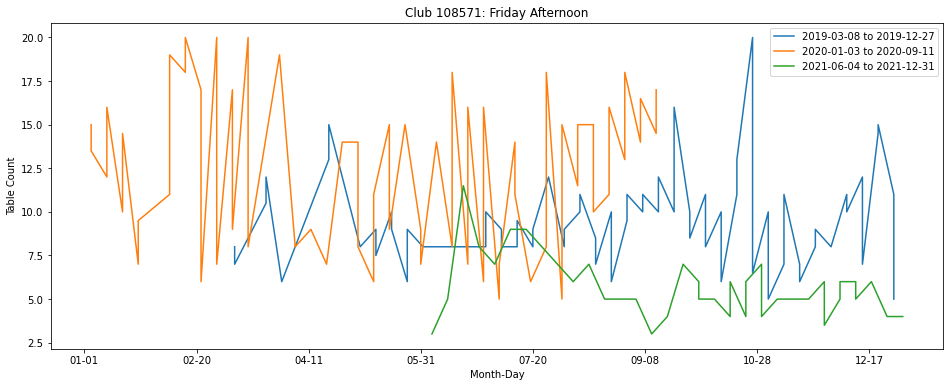

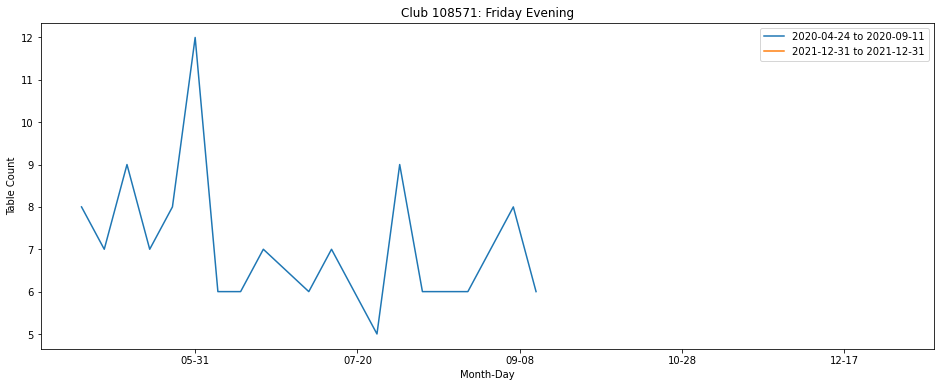

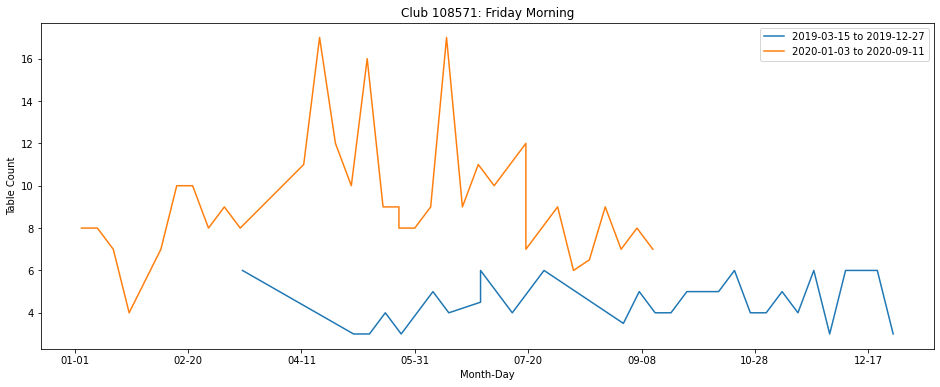

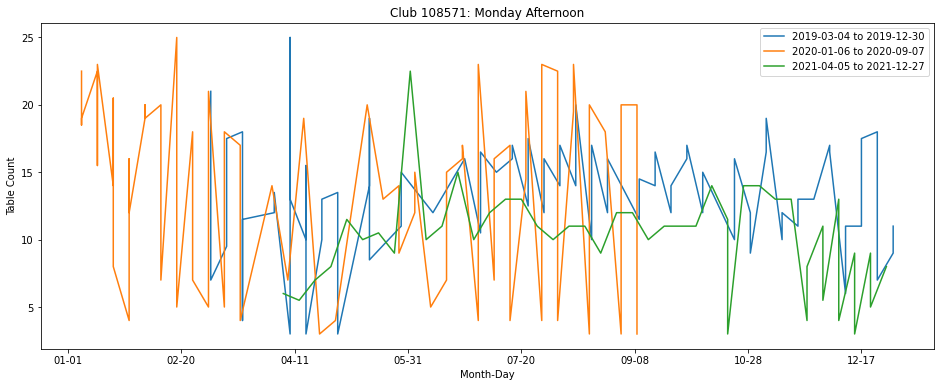

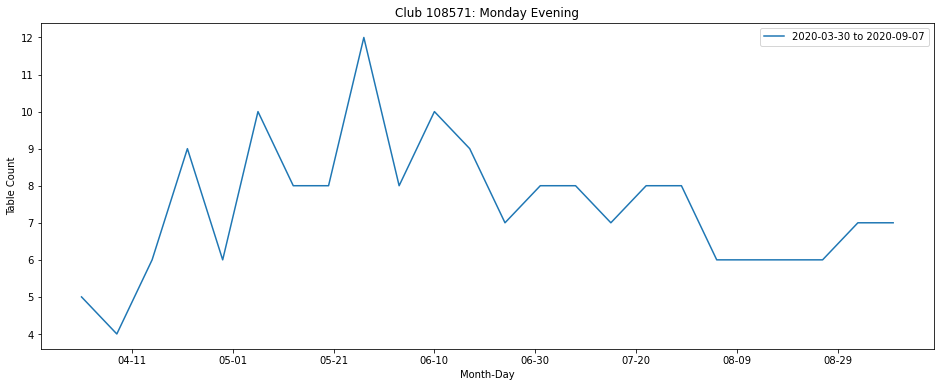

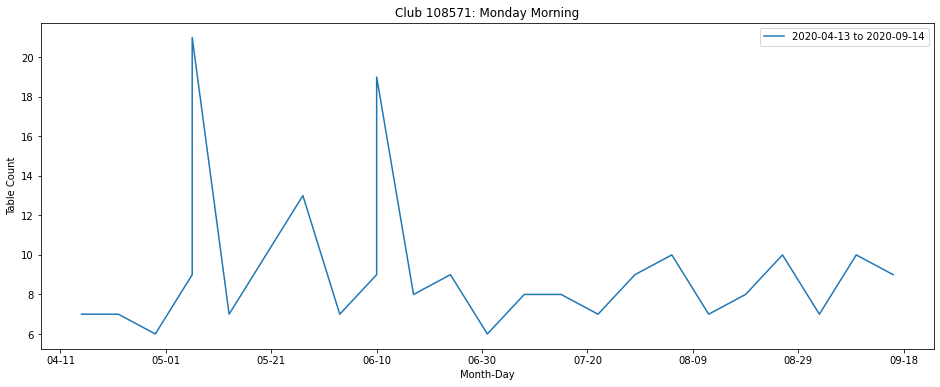

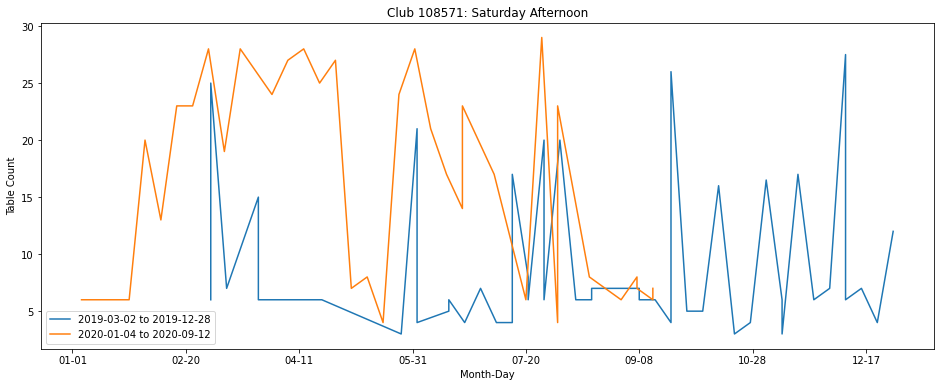

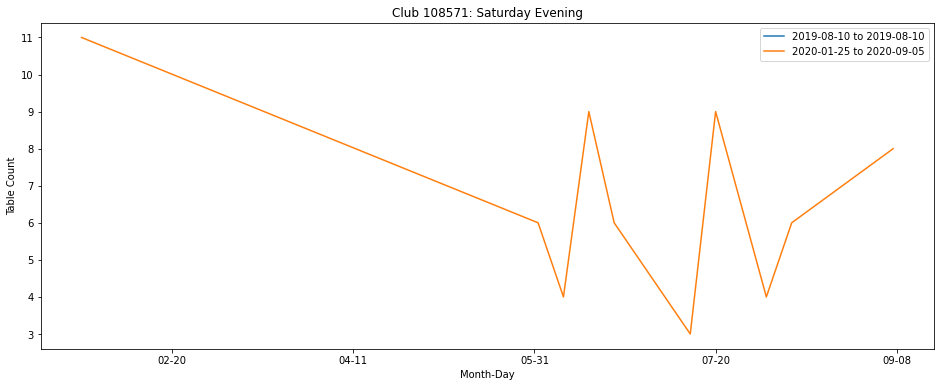

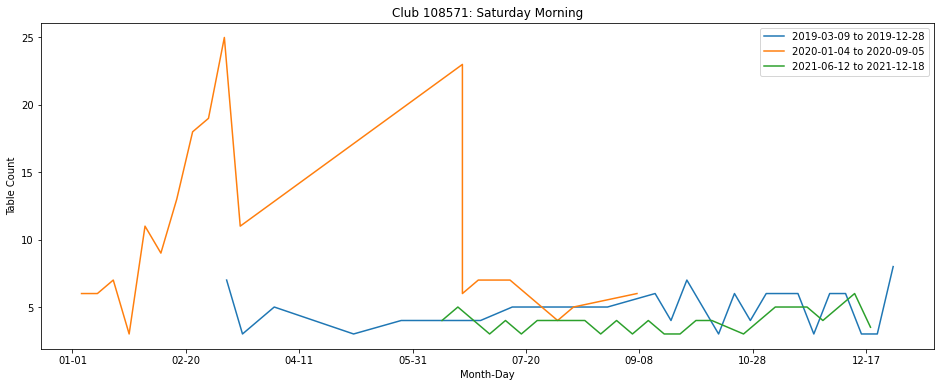

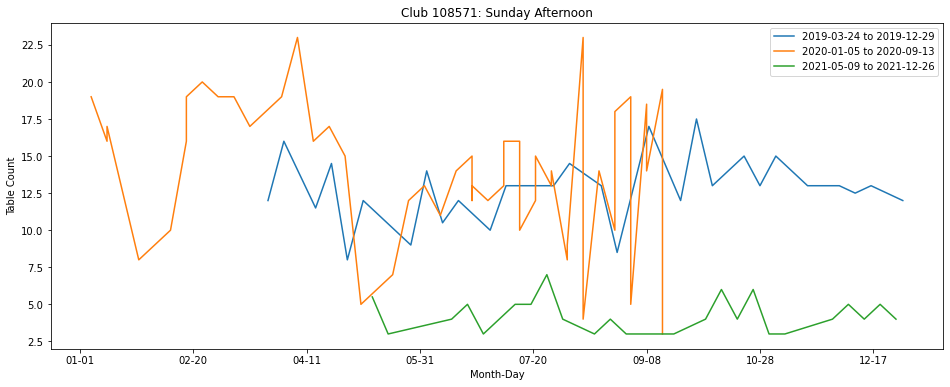

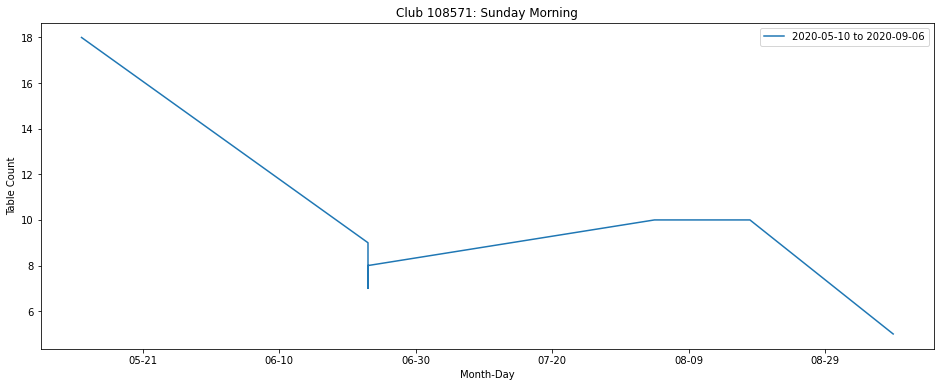

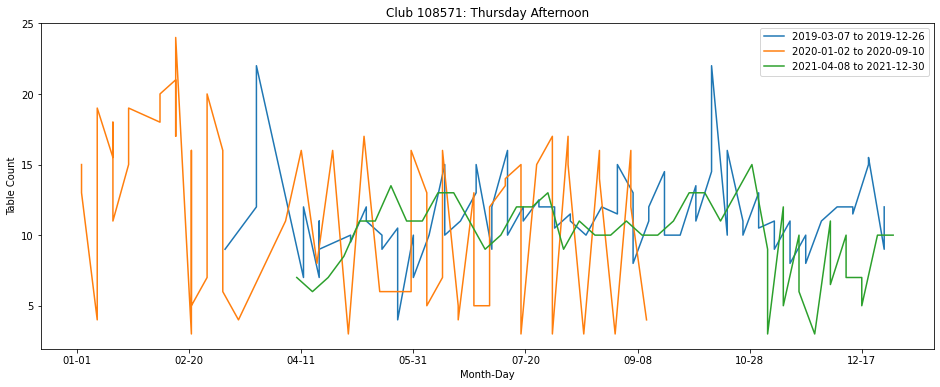

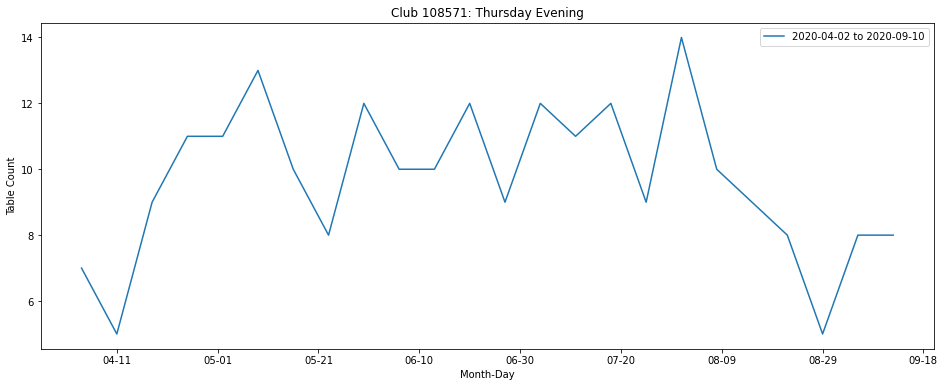

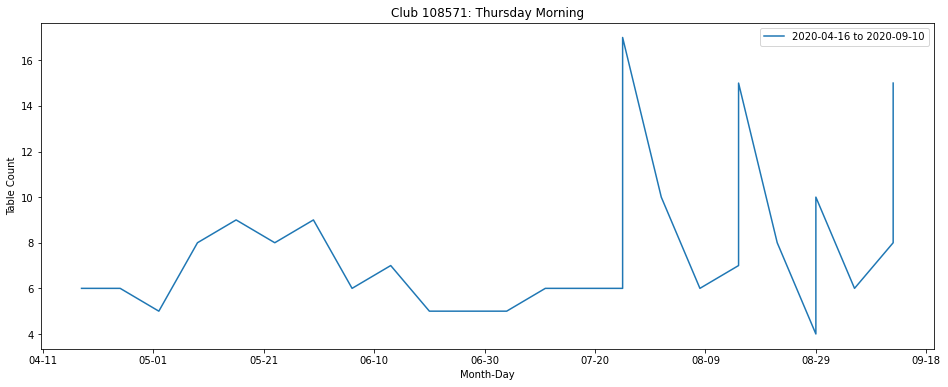

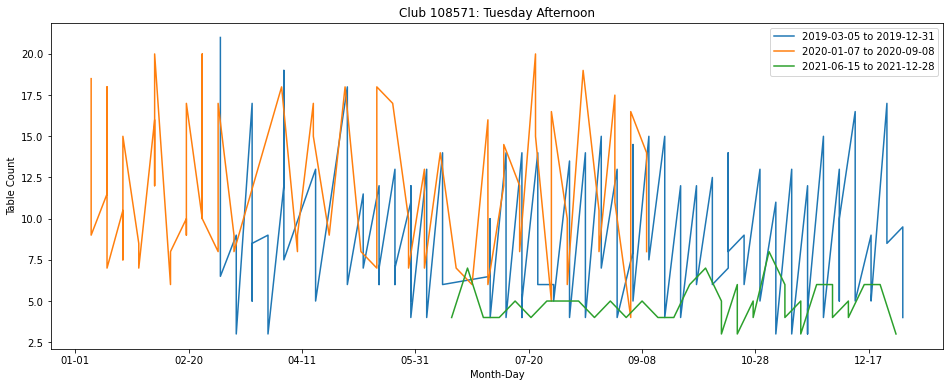

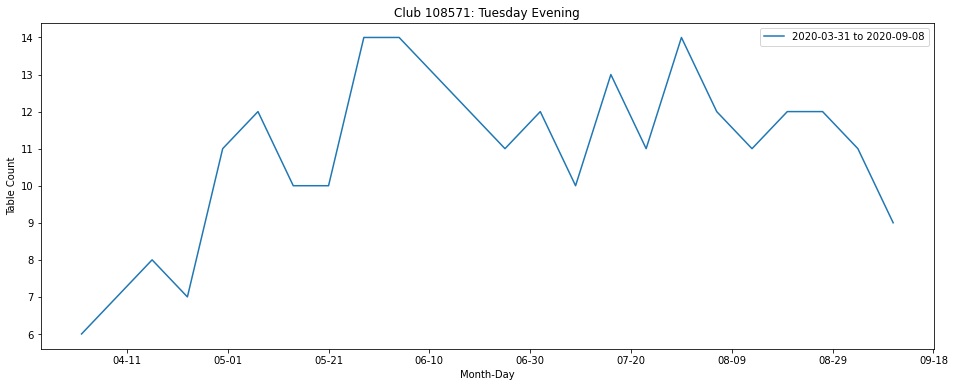

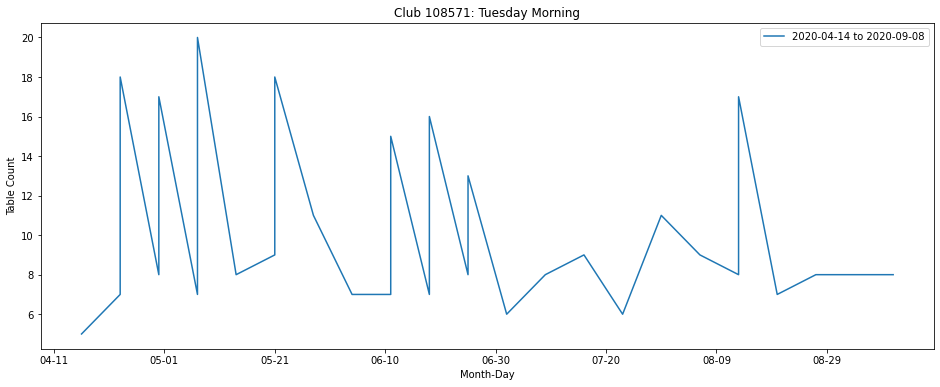

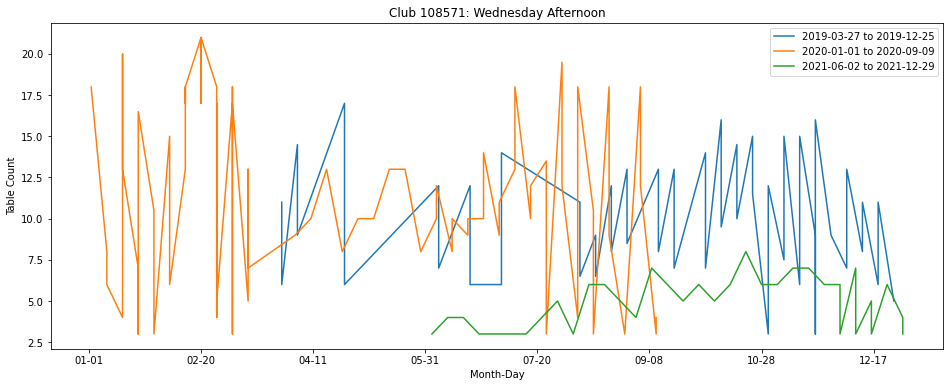

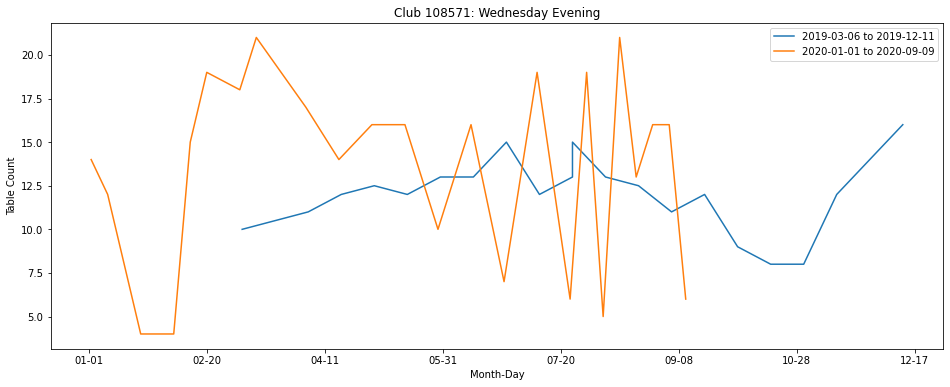

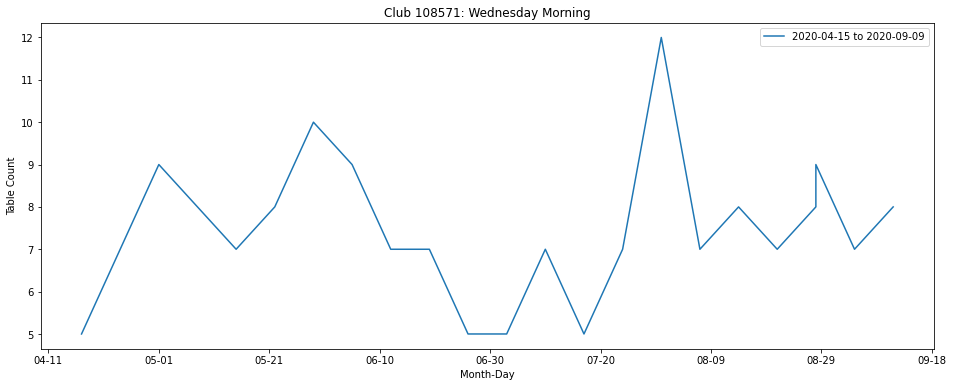

In [18]:
clubs = [108571] # [267096] # select club numbers
cing = df_events.groupby('club_id_number')
for cing_key,cing_df in cing:
    if cing_key not in clubs: # continue if club number is not in list
        continue
    #display(cing_key, len(cing_df), cing_df.head())
    eg = cing_df.groupby('club_session')
    for eg_key, eg_df in eg:
        #display(eg_key, len(eg_df), eg_df.head())
        if len(eg_df) < 10: # skip events with too few dates
            continue
        fig, ax = plt.subplots(figsize=(16,6))
        ax.set(xlabel='Month-Day',ylabel='Table Count',title='Club '+str(cing_key)+': '+eg_key)
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d')) # show month-day for x-axis.
        for year in [2019,2020,2021]:
            row_filter = ~eg_df['olExists'] & eg_df['start_date'].dt.year.eq(year)
            if len(eg_df[row_filter]) == 0: # filter out years with no events
                continue
            #eg_df[row_filter].pivot(index='start_date', columns='club_session', values='tb_count')
            #ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)
            #days = eg_df[row_filter]['start_date'].dt.strftime('%m-%d').sort_values() #.dt.month.sort_values()
            days = eg_df[row_filter]['start_date'].dt.dayofyear.sort_values() # can't figure out indexing unless julian.
            tables = eg_df[row_filter]['tb_count']
            min_date = eg_df[row_filter]['start_date'].min().strftime('%Y-%m-%d')
            max_date = eg_df[row_filter]['start_date'].max().strftime('%Y-%m-%d')
            plt.plot(days,tables,label=min_date+' to '+max_date)
        plt.legend()